# Principal component analysis (PCA) on descriptive sensory analysis data

This notebook illustrates how to use the **hoggorm** package to carry out principal component analysis (PCA) on a multivariate descriptive sensory analysis data from cheese. Furthermore, we will learn how to visualise the results of the PCA using the **hoggormPlot** package.

---

### Import packages and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [1]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

Next, load the cancer data that we are going to analyse using **hoggorm**. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

In [2]:
# Load data

# Insert code for reading data from other folder in repository instead of directly from same repository.
data_df = pd.read_csv('cheese_sensory.txt', sep='\t', index_col=0)
data_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Product,,,,,,,,,,,,,,,,,
Pr 01,6.19,3.33,3.43,2.14,1.29,3.11,6.70,3.22,2.66,5.10,4.57,3.34,2.93,1.89,1.23,3.15,4.07
Pr 02,6.55,2.50,4.32,2.52,1.24,3.91,6.68,2.57,2.42,4.87,4.75,4.13,3.09,2.29,1.51,3.93,4.07
Pr 03,6.23,3.43,3.42,2.03,1.28,2.93,6.61,3.39,2.56,5.00,4.73,3.44,3.08,1.81,1.37,3.19,4.16
Pr 04,6.14,2.93,3.96,2.13,1.08,3.12,6.51,2.98,2.50,4.66,4.68,3.92,2.93,1.99,1.19,3.13,4.29
Pr 05,6.70,1.97,4.72,2.43,1.13,4.60,7.01,2.07,2.32,5.29,5.19,4.52,3.14,2.47,1.34,4.67,4.03
Pr 06,6.19,5.28,1.59,1.07,1.00,1.13,6.42,5.18,2.82,5.02,4.49,2.05,2.54,1.18,1.18,1.29,4.11
Pr 07,6.17,3.45,3.32,2.04,1.47,2.69,6.39,3.81,2.76,4.58,4.32,3.22,2.72,1.81,1.33,2.52,4.26
Pr 08,6.90,2.58,4.24,2.58,1.70,4.19,7.11,2.06,2.47,4.58,5.09,4.44,3.25,2.62,1.73,4.87,3.98
Pr 09,6.70,2.53,4.53,2.32,1.22,4.16,6.91,2.42,2.41,4.52,4.96,4.49,3.37,2.47,1.64,4.54,4.01


Let's have a look at the dimensions of the data frame.

In [3]:
np.shape(data_df)

(14, 17)

There are observations for 34 countries as well as all OECD countries together, which results in 35 rows. Furthermore, there are 10 columns where each column represents one type of cancer in men.

The ``nipalsPCA`` class in hoggorm accepts only **numpy** arrays with numerical values and not pandas data frames. Therefore, the pandas data frame holding the imported data needs to be "taken apart" into three parts: 
* a numpy array holding the numeric values
* a Python list holding variable (column) names
* a Python list holding object (row) names. 

The array with values will be used as input for the ``nipalsPCA`` class for analysis. The Python lists holding the variable and row names will be used later in the plotting function from the **hoggormPlot** package when visualising the results of the analysis. Below is the code needed to access both data, variable names and object names.

In [4]:
# Get the values from the data frame
data = data_df.values

# Get the variable or columns names
data_varNames = list(data_df.columns)

# Get the object or row names
data_objNames = list(data_df.index)

Let's have a quick look at the column or variable names.

In [5]:
data_varNames

['Att 01',
 'Att 02',
 'Att 03',
 'Att 04',
 'Att 05',
 'Att 06',
 'Att 07',
 'Att 08',
 'Att 09',
 'Att 10',
 'Att 11',
 'Att 12',
 'Att 13',
 'Att 14',
 'Att 15',
 'Att 16',
 'Att 17']

Now show the object or row names.

In [6]:
data_objNames

['Pr 01',
 'Pr 02',
 'Pr 03',
 'Pr 04',
 'Pr 05',
 'Pr 06',
 'Pr 07',
 'Pr 08',
 'Pr 09',
 'Pr 10',
 'Pr 11',
 'Pr 12',
 'Pr 13',
 'Pr 14']

---

### Apply PCA to our data

Now, let's run PCA on the data using the ``nipalsPCA`` class. The documentation provides a [description of the input parameters](https://hoggorm.readthedocs.io/en/latest/pca.html). Using input paramter ``arrX`` we define which numpy array we would like to analyse. By setting input parameter ``Xstand=False`` we make sure that the variables are only mean centered, not scaled to unit variance. This is the default setting and actually doesn't need to expressed explicitly. Setting paramter ``cvType=["loo"]`` we make sure that we compute the PCA model using full cross validation. ``"loo"`` means "Leave One Out". By setting paramter ``numpComp=4`` we ask for four principal components (PC) to be computed.

In [7]:
model = ho.nipalsPCA(arrX=data, Xstand=False, cvType=["loo"], numComp=4)

loo
loo


That's it, the PCA model has been computed. Now we would like to inspect the results by visualising them. We can do this using the taylor-made plotting function for PCA from the separate [**hoggormPlot** package](https://hoggormplot.readthedocs.io/en/latest/). If we wish to plot the results for component 1 and component 2, we can do this by setting the input argument ``comp=[1, 2]``. The input argument ``plots=[1, 2, 3, 4, 6]`` lets the user define which plots are to be plotted. If this list for example contains value ``1``, the function will generate the scores plot for the model. If the list contains value ``2``, then the loadings plot will be plotted. Value ``3`` stands for correlation loadings plot and value ``4`` stands for bi-plot and ``6`` stands for explained variance plot. The hoggormPlot documentation provides a [description of input paramters](https://hoggormplot.readthedocs.io/en/latest/mainPlot.html).

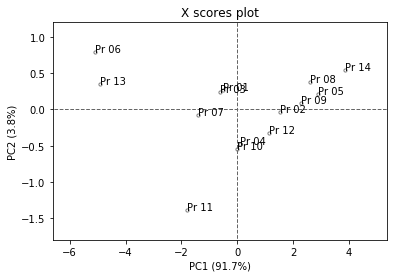

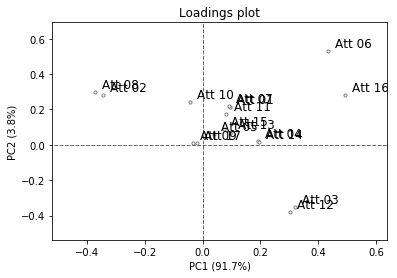

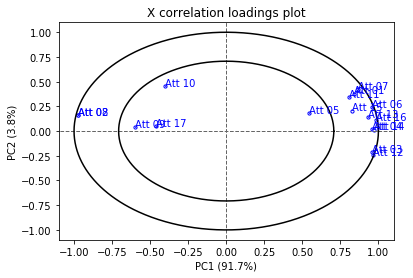

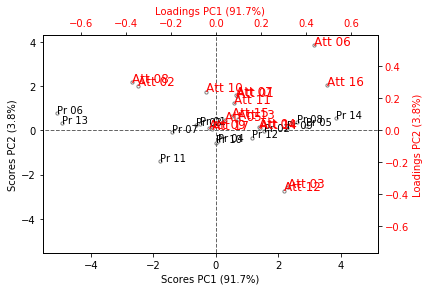

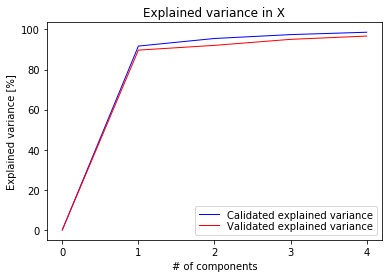

In [8]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4, 6], 
         objNames=data_objNames, 
         XvarNames=data_varNames)

---

### Accessing numerical results

Now that we have visualised the PCA results, we may also want to access the numerical results. Below are some examples. For a complete list of accessible results, please see this part of the documentation.  

In [9]:
# Get scores and store in numpy array
scores = model.X_scores()

# Get scores and store in pandas dataframe with row and column names
scores_df = pd.DataFrame(model.X_scores())
scores_df.index = data_objNames
scores_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_scores().shape[1])]
scores_df

,PC1,PC2,PC3,PC4
Pr 01,-0.501205,0.266029,-0.280707,0.055819
Pr 02,1.531956,-0.036587,-0.417397,0.115648
Pr 03,-0.627608,0.237580,-0.102188,0.016577
Pr 04,0.080169,-0.480196,-0.416730,0.108057
Pr 05,2.882254,0.214949,-0.636043,-0.536969
Pr 06,-5.086867,0.783773,0.403236,0.080473
Pr 07,-1.400832,-0.076834,-0.322059,0.730908
Pr 08,2.584102,0.381835,0.461202,0.160848
Pr 09,2.264157,0.084262,0.037005,0.073237
Pr 10,-0.000691,-0.549657,0.384169,-0.026973


In [10]:
help(ho.nipalsPCA.X_scores)

Help on function X_scores in module hoggorm.pca:

X_scores(self)
    Returns array holding scores T. First column holds scores for
    component 1, second column holds scores for component 2, etc.



In [11]:
# Dimension of the scores
np.shape(model.X_scores())

(14, 4)

We see that the numpy array holds the scores for four components as required when computing the PCA model.

In [12]:
# Get loadings and store in numpy array
loadings = model.X_loadings()

# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(model.X_loadings())
loadings_df.index = data_varNames
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4
Att 01,0.095756,0.213418,0.110989,0.034241
Att 02,-0.345165,0.280602,0.351717,-0.026955
Att 03,0.320400,-0.353435,-0.344550,-0.042383
Att 04,0.191426,0.020166,-0.070290,0.362712
Att 05,0.038677,0.063817,0.092521,0.345507
Att 06,0.434063,0.532828,-0.464027,0.206703
Att 07,0.090249,0.219497,0.099313,-0.127992
Att 08,-0.371582,0.300093,-0.214017,0.265250
Att 09,-0.032043,0.011523,0.080383,0.279356
Att 10,-0.043927,0.242686,-0.305197,-0.591165


In [13]:
help(ho.nipalsPCA.X_loadings)

Help on function X_loadings in module hoggorm.pca:

X_loadings(self)
    Returns array holding loadings P of array X. Rows represent variables
    and columns represent components. First column holds loadings for
    component 1, second column holds scores for component 2, etc.



In [14]:
np.shape(model.X_loadings())

(17, 4)

Here we see that the array holds the loadings for the 10 variables in the data across four components.

In [15]:
# Get loadings and store in numpy array
loadings = model.X_corrLoadings()

# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(model.X_corrLoadings())
loadings_df.index = data_varNames
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_corrLoadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4
Att 01,0.839489,0.380074,0.141458,0.033985
Att 02,-0.972762,0.160641,0.144112,-0.008618
Att 03,0.959356,-0.214974,-0.149988,-0.014375
Att 04,0.960568,0.020556,-0.051293,0.206192
Att 05,0.545112,0.182706,0.189557,0.551638
Att 06,0.957721,0.238822,-0.148867,0.051669
Att 07,0.862756,0.426249,0.138029,-0.138612
Att 08,-0.975683,0.160072,-0.081713,0.078893
Att 09,-0.602730,0.044025,0.219801,0.595248
Att 10,-0.402761,0.452033,-0.406834,-0.613969


In [16]:
help(ho.nipalsPCA.X_corrLoadings)

Help on function X_corrLoadings in module hoggorm.pca:

X_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [17]:
# Get calibrated explained variance of each component
calExplVar = model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,91.711092
PC2,3.784519
PC3,1.938654
PC4,1.176851


In [18]:
help(ho.nipalsPCA.X_calExplVar)

Help on function X_calExplVar in module hoggorm.pca:

X_calExplVar(self)
    Returns a list holding the calibrated explained variance for
    each component. First number in list is for component 1, second number
    for component 2, etc.



In [19]:
# Get cumulative calibrated explained variance
cumCalExplVar = model.X_cumCalExplVar()

# Get cumulative calibrated explained variance and store in pandas dataframe with row and column names
cumCalExplVar_df = pd.DataFrame(model.X_cumCalExplVar())
cumCalExplVar_df.columns = ['cumulative calibrated explained variance']
cumCalExplVar_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumCalExplVar_df

,cumulative calibrated explained variance
PC0,0.000000
PC1,91.711092
PC2,95.495611
PC3,97.434265
PC4,98.611116


In [20]:
help(ho.nipalsPCA.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.pca:

X_cumCalExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [21]:
# Get cumulative calibrated explained variance for each variable
cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable and store in pandas dataframe with row and column names
cumCalExplVar_ind_df = pd.DataFrame(model.X_cumCalExplVar_indVar())
cumCalExplVar_ind_df.columns = data_varNames
cumCalExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumCalExplVar_ind_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,70.474211,94.626567,92.036353,92.269129,29.714715,91.723039,74.434732,95.195665,36.328289,16.221618,65.074545,92.544953,86.633263,94.693765,67.858463,97.049563,21.195723
PC2,84.919941,97.207078,96.657667,92.311389,33.052898,97.426690,92.603667,97.757923,36.522101,36.654954,76.737650,98.486921,88.631578,94.718732,72.136672,98.362561,21.475124
PC3,86.921297,99.284035,98.907511,92.574480,36.646288,99.642617,94.509232,98.425540,41.353398,53.205263,78.276541,98.897033,91.819062,97.660198,90.686484,99.816553,51.496651
PC4,87.036847,99.291449,98.928198,96.825865,67.077823,99.909506,96.430354,99.047888,76.786759,90.903755,94.871511,98.915538,92.081035,97.718305,94.486308,99.867892,62.910246


In [22]:
help(ho.nipalsPCA.X_cumCalExplVar_indVar)

Help on function X_cumCalExplVar_indVar in module hoggorm.pca:

X_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in X after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [23]:
# Get calibrated predicted X for a given number of components

# Predicted X from calibration using 1 component
X_from_1_component = model.X_predCal()[1]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_1_component_df = pd.DataFrame(model.X_predCal()[1])
X_from_1_component_df.index = data_objNames
X_from_1_component_df.columns = data_varNames
X_from_1_component_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.312007,3.334427,3.486557,1.983342,1.218472,2.840303,6.625481,3.208382,2.551060,4.867731,4.697810,3.566884,2.949254,1.949001,1.363672,3.166674,4.086977
Pr 02,6.506694,2.632651,4.137981,2.372543,1.297108,3.722822,6.808972,2.452896,2.485912,4.778421,4.866059,4.182212,3.149312,2.347118,1.511039,4.165326,4.049983
Pr 03,6.299903,3.378057,3.446057,1.959145,1.213583,2.785436,6.614073,3.255351,2.555110,4.873283,4.687349,3.528628,2.936816,1.924250,1.354510,3.104587,4.089276
Pr 04,6.367677,3.133757,3.672829,2.094632,1.240958,3.092655,6.677949,2.992354,2.532431,4.842193,4.745920,3.742834,3.006460,2.062841,1.405811,3.452235,4.076398
Pr 05,6.635993,2.166575,4.570617,2.631026,1.349333,4.308936,6.930835,1.951150,2.442644,4.719106,4.977801,4.590874,3.282178,2.611522,1.608912,4.828568,4.025414
Pr 06,5.872903,4.917238,2.017312,1.105525,1.041115,0.849838,6.211629,4.912330,2.697998,5.069164,4.318333,2.179051,2.498037,1.051074,1.031293,0.914280,4.170413
Pr 07,6.225862,3.644947,3.198317,1.811129,1.183678,2.449808,6.544291,3.542666,2.579887,4.907248,4.623363,3.294615,2.860733,1.772843,1.298465,2.724794,4.103345
Pr 08,6.607443,2.269487,4.475088,2.573951,1.337801,4.179519,6.903927,2.061938,2.452198,4.732203,4.953128,4.500640,3.252840,2.553141,1.587301,4.682121,4.030839
Pr 09,6.576806,2.379920,4.372578,2.512705,1.325427,4.040643,6.875052,2.180823,2.462450,4.746257,4.926651,4.403810,3.221359,2.490492,1.564111,4.524970,4.036661
Pr 10,6.359934,3.161667,3.646922,2.079153,1.237830,3.057557,6.670652,3.022400,2.535022,4.845745,4.739229,3.718362,2.998503,2.047008,1.399950,3.412518,4.077870


In [24]:
# Get predicted X for a given number of components

# Predicted X from calibration using 4 components
X_from_4_component = model.X_predCal()[4]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_4_component_df = pd.DataFrame(model.X_predCal()[4])
X_from_4_component_df.index = data_objNames
X_from_4_component_df.columns = data_varNames
X_from_4_component_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.339538,3.308841,3.486884,2.028683,1.228764,3.123844,6.648852,3.363097,2.547155,4.984965,4.698533,3.425451,2.929720,1.888926,1.322790,3.119854,4.138097
Pr 02,6.456519,2.472462,4.289825,2.443091,1.296112,3.920916,6.744686,2.561922,2.484245,4.828562,4.780561,4.133819,3.086913,2.252421,1.416474,3.970905,4.125403
Pr 03,6.339832,3.408334,3.396595,1.977131,1.225018,2.962870,6.653951,3.352914,2.554265,4.952328,4.713265,3.424154,2.940238,1.904423,1.351670,3.127499,4.108892
Pr 04,6.222642,2.849530,3.981552,2.153434,1.209091,3.052503,6.517331,2.966099,2.523586,4.788961,4.586774,3.862286,2.911874,1.961031,1.270524,3.134081,4.146264
Pr 05,6.592887,2.017657,4.736553,2.485303,1.118676,4.607616,6.983576,2.009348,2.243988,5.282827,5.157294,4.441869,3.241071,2.440914,1.381078,4.679568,4.059059
Pr 06,6.087684,5.276822,1.597953,1.122175,1.156245,1.096975,6.413412,5.082581,2.761924,5.088736,4.459106,1.936008,2.604200,1.162508,1.218807,1.293434,4.127900
Pr 07,6.198747,3.490412,3.305460,2.097327,1.401511,2.709394,6.401891,3.782408,2.757297,4.554806,4.312301,3.251395,2.778364,1.726496,1.318301,2.497116,4.236673
Pr 08,6.745629,2.534507,4.174410,2.607575,1.460414,4.202209,7.012955,2.120484,2.538604,4.589024,5.000005,4.414329,3.333120,2.675483,1.766083,4.964182,3.985036
Pr 09,6.601404,2.414606,4.326943,2.538368,1.359532,4.083507,6.887849,2.217616,2.486855,4.712117,4.917405,4.374363,3.228864,2.503731,1.592395,4.556667,4.040648
Pr 10,6.284342,3.143278,3.709968,2.031282,1.228977,2.580845,6.591609,2.768078,2.552034,4.611049,4.688003,3.980115,3.009224,2.128436,1.446755,3.419472,4.011824


In [25]:
help(ho.nipalsPCA.X_predCal)

Help on function X_predCal in module hoggorm.pca:

X_predCal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    calibration after each computed component. Dictionary key represents
    order of component.



In [26]:
# Get validated explained variance of each component
valExplVar = model.X_valExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
valExplVar_df = pd.DataFrame(model.X_valExplVar())
valExplVar_df.columns = ['validated explained variance']
valExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
valExplVar_df

,validated explained variance
PC1,89.695259
PC2,2.367054
PC3,3.000506
PC4,1.642879


In [27]:
help(ho.nipalsPCA.X_valExplVar)

Help on function X_valExplVar in module hoggorm.pca:

X_valExplVar(self)
    Returns a list holding the validated explained variance for X after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [28]:
# Get cumulative validated explained variance
cumValExplVar = model.X_cumValExplVar()

# Get cumulative validated explained variance and store in pandas dataframe with row and column names
cumValExplVar_df = pd.DataFrame(model.X_cumValExplVar())
cumValExplVar_df.columns = ['cumulative validated explained variance']
cumValExplVar_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumValExplVar_df

,cumulative validated explained variance
PC0,0.000000
PC1,89.695259
PC2,92.062312
PC3,95.062819
PC4,96.705698


In [29]:
help(ho.nipalsPCA.X_cumValExplVar)

Help on function X_cumValExplVar in module hoggorm.pca:

X_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component.



In [30]:
# Get cumulative validated explained variance for each variable
cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative validated explained variance for each variable and store in pandas dataframe with row and column names
cumValExplVar_ind_df = pd.DataFrame(model.X_cumValExplVar_indVar())
cumValExplVar_ind_df.columns = data_varNames
cumValExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumValExplVar_ind_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,60.758218,92.903688,88.648599,90.936900,20.551169,90.682501,67.164466,94.265062,6.449322,-6.904037,55.909808,90.937199,85.073824,93.920674,59.922358,96.173785,17.008178
PC2,75.091127,95.493089,93.766447,90.216558,19.057500,92.433499,89.587513,94.877221,-5.935075,-8.925615,68.801728,96.240976,86.890136,93.135298,58.558275,97.460565,-21.032417
PC3,77.636112,97.998892,97.857451,87.979309,-3.212596,98.954792,90.045240,96.566838,-14.292728,7.228006,64.711140,97.724061,85.639562,94.339156,82.764976,99.526474,23.850685
PC4,70.944990,98.067667,97.890550,93.806682,14.277290,99.614752,92.711142,97.456069,46.613553,82.547632,87.773777,96.749543,82.313227,93.824721,88.064581,99.697050,32.263310


In [31]:
help(ho.nipalsPCA.X_cumValExplVar_indVar)

Help on function X_cumValExplVar_indVar in module hoggorm.pca:

X_cumValExplVar_indVar(self)
    Returns an array holding the cumulative validated explained variance
    for each variable in X after each component. First row represents
    zero components, second row represents component 1, third row for
    compnent 2, etc. Columns represent variables.



In [32]:
# Get validated predicted X for a given number of components

# Predicted X from validation using 1 component
X_from_1_component_val = model.X_predVal()[1]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_1_component_val_df = pd.DataFrame(model.X_predVal()[1])
X_from_1_component_val_df.index = data_objNames
X_from_1_component_val_df.columns = data_varNames
X_from_1_component_val_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.321932,3.334168,3.491657,1.971144,1.212817,2.819470,6.619674,3.206781,2.542288,4.849058,4.708178,3.585587,2.950969,1.954072,1.374494,3.168876,4.088299
Pr 02,6.501670,2.648498,4.117002,2.355921,1.303013,3.700757,6.822306,2.442141,2.493082,4.768843,4.878060,4.186354,3.155193,2.352329,1.510873,4.188164,4.047898
Pr 03,6.305708,3.373448,3.448529,1.953544,1.208190,2.774027,6.614489,3.243945,2.554678,4.862862,4.683939,3.536204,2.925206,1.933793,1.353315,3.098095,4.083473
Pr 04,6.385159,3.149624,3.650552,2.091811,1.253332,3.090328,6.690836,2.993495,2.534945,4.856245,4.750954,3.729037,3.012297,2.068350,1.422392,3.476796,4.059960
Pr 05,6.620673,2.215418,4.531467,2.662252,1.389410,4.238410,6.912736,1.941164,2.467034,4.612559,4.934899,4.594354,3.305507,2.631689,1.657194,4.841689,4.025028
Pr 06,5.716833,4.686222,2.279631,1.144898,1.064576,0.746651,6.110567,4.729040,2.631455,5.086455,4.236178,2.285350,2.485418,1.005523,0.960328,0.769729,4.199640
Pr 07,6.232702,3.660579,3.189808,1.790200,1.155120,2.430682,6.561056,3.511051,2.561228,4.939926,4.655168,3.305830,2.876202,1.771486,1.296169,2.751575,4.087225
Pr 08,6.556990,2.224464,4.508297,2.569178,1.277206,4.168840,6.867850,2.069242,2.449770,4.758115,4.928710,4.505121,3.251167,2.538066,1.562009,4.640803,4.039662
Pr 09,6.558221,2.361260,4.347290,2.538710,1.340199,4.019637,6.869212,2.149602,2.470240,4.779115,4.921091,4.388868,3.199166,2.491697,1.552562,4.518491,4.040623
Pr 10,6.360698,3.163332,3.647456,2.072166,1.243048,3.095064,6.683779,3.041813,2.525408,4.852340,4.746862,3.692084,2.989927,2.034471,1.395331,3.417329,4.089244


In [33]:
# Get validated predicted X for a given number of components

# Predicted X from validation using 3 components
X_from_3_component_val = model.X_predVal()[3]

# Predicted X from calibration using 3 components stored in pandas data frame with row and columns names
X_from_3_component_val_df = pd.DataFrame(model.X_predVal()[3])
X_from_3_component_val_df.index = data_objNames
X_from_3_component_val_df.columns = data_varNames
X_from_3_component_val_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.360633,3.315678,3.494673,1.983676,1.197300,3.092077,6.650614,3.357080,2.513557,4.994617,4.743662,3.451465,2.936340,1.893384,1.332340,3.131038,4.135418
Pr 02,6.433230,2.481692,4.279644,2.364576,1.254152,3.875998,6.782745,2.511023,2.454280,4.908544,4.850385,4.143455,3.097305,2.243589,1.378508,4.007629,4.114168
Pr 03,6.350347,3.406499,3.395414,1.964491,1.212921,2.958356,6.660384,3.341740,2.548721,4.955897,4.718020,3.425761,2.926651,1.914479,1.347584,3.123359,4.100673
Pr 04,6.248422,2.854384,3.965634,2.100824,1.194557,2.990891,6.550625,2.912082,2.488705,4.912781,4.629963,3.848399,2.921869,1.956625,1.281168,3.177541,4.082263
Pr 05,6.617568,2.145239,4.577304,2.764164,1.431089,4.546312,6.895807,2.113040,2.483129,4.661089,4.868409,4.456613,3.277748,2.557202,1.615825,4.739199,4.103596
Pr 06,5.904038,5.177300,1.701867,1.112680,1.242584,1.004542,6.405788,4.850992,2.601372,5.366627,4.486668,1.824620,2.668043,1.093589,1.179794,1.253998,4.132811
Pr 07,6.196952,3.578245,3.278874,1.789226,1.118990,2.473630,6.532822,3.520403,2.534853,5.002412,4.641057,3.307311,2.850065,1.722743,1.235574,2.658627,4.109321
Pr 08,6.661184,2.485792,4.203633,2.526773,1.271773,4.173333,6.993977,2.083939,2.481596,4.770894,5.050723,4.412293,3.359974,2.659546,1.709469,4.970624,3.970245
Pr 09,6.580679,2.397935,4.303408,2.538650,1.349410,4.050381,6.892116,2.167862,2.474206,4.790725,4.939382,4.359972,3.209846,2.501469,1.569439,4.558039,4.036350
Pr 10,6.270425,3.138566,3.732409,2.009474,1.257453,2.624372,6.613778,2.795865,2.530413,4.562594,4.688713,3.942787,2.977472,2.099791,1.441950,3.425845,4.045377


In [34]:
help(ho.nipalsPCA.X_predVal)

Help on function X_predVal in module hoggorm.pca:

X_predVal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    validation after each computed component. Dictionary key represents
    order of component.



In [35]:
# Get predicted scores for new measurements (objects) of X

# First pretend that we acquired new X data by using part of the existing data and overlaying some noise
import numpy.random as npr
new_data = data[0:4, :] + npr.rand(4, np.shape(data)[1])
np.shape(new_data)

# Now insert the new data into the existing model and compute scores for two components (numComp=2)
pred_scores = model.X_scores_predict(new_data, numComp=2)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_scores_df = pd.DataFrame(model.X_scores_predict(new_data, numComp=2))
pred_scores_df.columns = ['PC{0}'.format(x) for x in range(2)]
pred_scores_df.index = ['new object {0}'.format(x) for x in range(np.shape(new_data)[0])]
pred_scores_df

,PC0,PC1
new object 0,0.283665,1.669553
new object 1,2.267250,0.886989
new object 2,0.154800,1.405315
new object 3,1.242297,0.570414


In [36]:
help(ho.nipalsPCA.X_scores_predict)

Help on function X_scores_predict in module hoggorm.pca:

X_scores_predict(self, Xnew, numComp=None)
    Returns array of X scores from new X data using the exsisting model.
    Rows represent objects and columns represent components.

